In [1]:
import os
import pandas as pd
os.chdir(r'/Users/anceaumathilde/data-ft-par-labs/Statistically_Significant_Insights/cleaned_data')
df=pd.read_csv('df_merged3.csv')

In [2]:
eu=pd.DataFrame(df.loc[df.State=='EU'][['CO2','F-Gas','N2O','Year']].groupby('Year').sum())
eu['Country']='EU'

rest= pd.DataFrame(df.loc[df.State=='Not EU'][['Year','CO2','Country']])
eu.reset_index(inplace=True)
df_eu=pd.concat([eu,rest],axis=0)

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes import jtplot

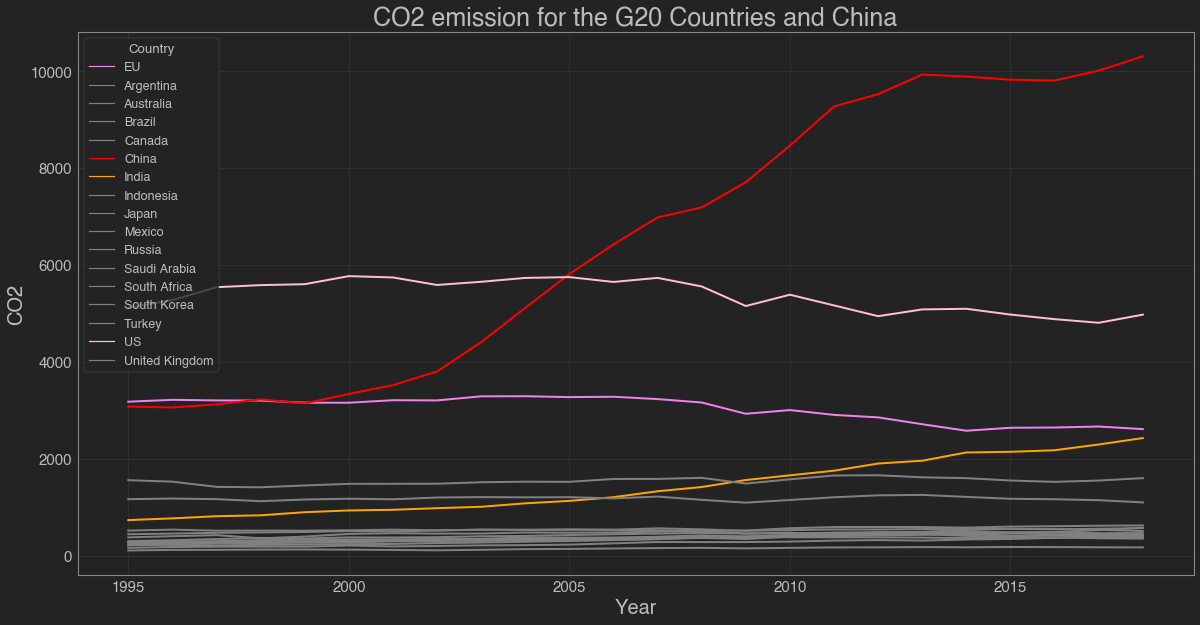

In [5]:
jtplot.style(theme='monokai')
fig=plt.figure(figsize=(20,10))
custom_palette = {}
for q in set(df_eu.Country):
    if q == 'China':
        custom_palette[q] = 'red'
    elif q == 'EU': 
        custom_palette[q] = 'violet'
    elif q == 'US': 
        custom_palette[q] = 'pink'
    elif q == 'India':
        custom_palette[q] = 'orange'
    else:
        custom_palette[q] = 'grey'
sns.lineplot(data=df_eu, x="Year", y="CO2",hue='Country',palette=custom_palette, linewidth = 2)
plt.xlabel('Year',fontsize=20)
plt.ylabel('CO2',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('CO2 emission for the G20 Countries and China',fontsize=25)
plt.show()

In [20]:
df_nox=df_eu.loc[df_eu.CO2<2400]


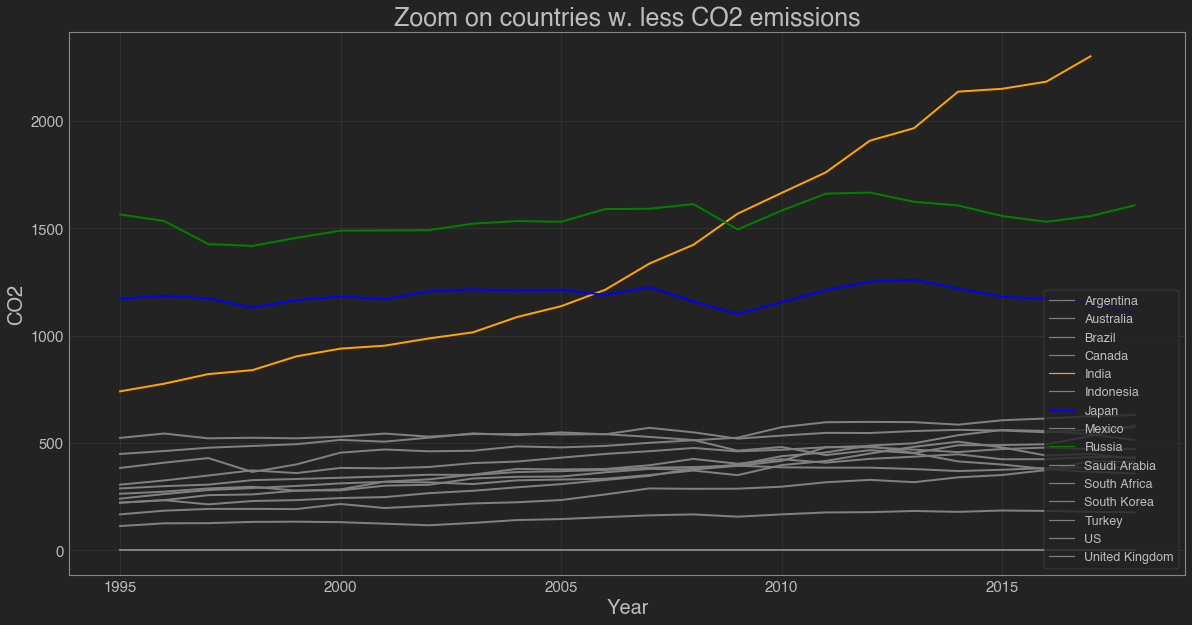

In [30]:
jtplot.style(theme='monokai')
fig=plt.figure(figsize=(20,10))
custom_palette = {}
for q in set(df_nox.Country):
    if q == 'India':
        custom_palette[q] = 'orange'
    elif q == 'Russia': 
        custom_palette[q] = 'green'
    elif q == 'Japan':
        custom_palette[q] = 'blue'
    else:
        custom_palette[q] = 'grey'

sns.lineplot(data=df_nox, x="Year", y="CO2",hue='Country',palette=custom_palette, linewidth = 2)
plt.legend(loc='lower right')
plt.xlabel('Year',fontsize=20)
plt.ylabel('CO2',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Zoom on countries w. less CO2 emissions',fontsize=25)
plt.show()




Text(0.5, 1.0, 'Considering industrial gas')

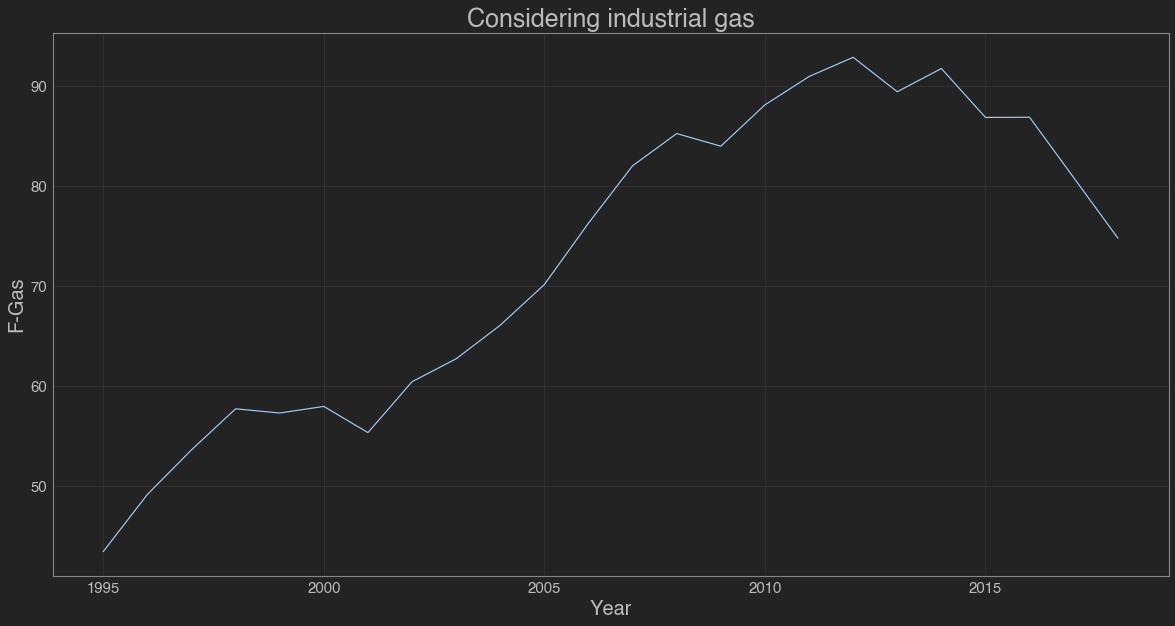

In [22]:

t=df_eu[['Year','F-Gas']].groupby(['F-Gas']).sum()
fig=plt.figure(figsize=(20,10))
sns.lineplot(data=t,x='Year',y=t.index,palette='OrRd')
plt.xlabel('Year',fontsize=20)
plt.ylabel('F-Gas',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Considering industrial gas',fontsize=25)

In [11]:
t

,Year
F-Gas,
43.47,1995
49.17,1996
53.63,1997
55.35,2001
57.31,1999
57.73,1998
57.97,2000
60.44,2002
62.73,2003
